In [1]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv('fetches1.csv',encoding="unicode_escape")

In [26]:
data = pd.read_csv('fetches2.csv')

In [27]:
data

,id_fetches,url,source_name,source_encoding,title,keywords,author,publish_date,crawltime,content,createtime
0,128,https://www.thepaper.cn/newsDetail_forward_728...,澎湃国际,utf-8,美疾控中心：全国至少4893名囚犯感染新冠肺炎_澎湃国际_澎湃新闻-The Paper,"美国,新冠肺炎",责任编辑：李琪,7/5/2020,7/5/2020 09:17:37,当地时间5月6日，美国疾病控制和预防中心表示，全美至少有4893名被拘留或监禁的囚犯感染新冠...,7/5/2020 09:17:38
1,129,https://www.thepaper.cn/newsDetail_forward_728...,澎湃国际,utf-8,墨西哥新增新冠肺炎确诊病例1609例，累计27634例_澎湃国际_澎湃新闻-The Paper,"墨西哥,新型冠状病毒肺炎",责任编辑：王卉,7/5/2020,7/5/2020 09:17:37,图片来源：墨西哥卫生部墨西哥当地时间5月6日，墨西哥卫生部宣布，截至墨西哥当地时间5月6日晚...,7/5/2020 09:17:39
2,130,https://www.thepaper.cn/newsDetail_forward_728...,澎湃国际,utf-8,意大利新增新冠肺炎确诊病例1444例，累计214457例_澎湃国际_澎湃新闻-The Paper,"意大利,新型冠状病毒肺炎",责任编辑：王卉,7/5/2020,7/5/2020 09:17:37,意大利民事保护部门6日发布的数据显示，意大利累计治愈新冠患者93245人，治愈人数首次超过现...,7/5/2020 09:17:39
3,132,https://www.thepaper.cn/newsDetail_forward_728...,澎湃国际,utf-8,俄罗斯单日新增过万病例，将分三阶段解除疫情限制性措施_澎湃国际_澎湃新闻-The Paper,"俄罗斯,疫情防控",责任编辑：李琪,7/5/2020,7/5/2020 09:17:37,5月5日，在俄罗斯首都莫斯科，医护人员转移病人。新华社 图俄罗斯联邦消费者权益保护和公益监督...,7/5/2020 09:17:39
4,133,https://www.thepaper.cn/newsDetail_forward_728...,澎湃国际,utf-8,特朗普否决国会限制其对伊战争权力的措施_澎湃国际_澎湃新闻-The Paper,"特朗普,美国,伊朗",责任编辑：李琪,7/5/2020,7/5/2020 09:17:38,当地时间5月6日，美国总统特朗普否决国会限制其对伊朗战争权力的措施。美国总统特朗普否决国会限...,7/5/2020 09:17:39
5,136,https://www.thepaper.cn/newsDetail_forward_728...,澎湃国际,utf-8,世卫组织：应进一步研究法国首例新冠肺炎阳性报告_澎湃国际_澎湃新闻-The Paper,世卫组织,责任编辑：伍智超,7/5/2020,7/5/2020 09:17:38,玛丽亚·范·科霍夫央视新闻客户端5月7日消息，当地时间5月6日，针对有论文显示去年12月27...,7/5/2020 09:17:40
6,137,https://www.thepaper.cn/newsDetail_forward_728...,澎湃国际,utf-8,特朗普：新冠肺炎疫情大流行比珍珠港事件更糟糕_澎湃国际_澎湃新闻-The Paper,"全球疫情,美国,美洲",责任编辑：胡甄卿,7/5/2020,7/5/2020 09:17:38,当地时间6日，美国总统特朗普表示，对美国而言，新冠肺炎大流行造成的后果比珍珠港事件更糟糕。据...,7/5/2020 09:17:40
7,138,https://www.thepaper.cn/newsDetail_forward_728...,澎湃国际,utf-8,全球新冠确诊逾374万，特朗普称疫情打击比911更糟糕_澎湃国际_澎湃新闻-The Paper,新冠肺炎,责任编辑：李琪,7/5/2020,7/5/2020 09:17:38,行人走在美国纽约时报广场附近空荡的街头。新华社 图美国约翰斯·霍普金斯大学发布的实时统计数据...,7/5/2020 09:17:41
8,140,https://www.thepaper.cn/newsDetail_forward_728...,澎湃国际,utf-8,委内瑞拉未遂政变参与者承认计划抓捕马杜罗，并将其带到美国_澎湃国际_澎湃新闻-The Paper,"美国,委内瑞拉,马杜罗",责任编辑：胡甄卿,7/5/2020,7/5/2020 09:17:38,当地时间6日，一名在委内瑞拉4日未遂政变中被抓获的美国籍雇佣兵在接受审讯时表示，自己的行动目...,7/5/2020 09:17:41
9,141,https://www.thepaper.cn/newsDetail_forward_728...,澎湃国际,utf-8,加拿大累计确诊新冠肺炎63496例，死亡4232例_澎湃国际_澎湃新闻-The Paper,"加拿大,新冠肺炎",责任编辑：李琪,7/5/2020,7/5/2020 09:17:38,5月4日，在加拿大米西索加市，工作人员在一家超市入口向顾客发口罩。新华社 图根据加拿大各省当...,7/5/2020 09:17:41


In [28]:
import jieba
import jieba.analyse
import jieba.posseg as pseg
import re

In [29]:
#建立停用词表
buff =[]
with open('stopword.txt') as fp:
    for item in fp:
        item = item.strip()
        if item not in buff:
            buff.append(item)
stopwords = buff
print(stopwords)

['00', '基于', '方法', '算法', '案例', '进行', '问题', '获取', 'q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'z', 'x', 'c', 'v', 'b', 'n', 'm', '<', '>', '/', '*', '!', '"', '#', '$', '%', '&', "'", '(', ')', '+', ',', '-', '--', '.', '..', '...', '......', '...................', './', '.一', '.数', '.日', '//', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '://', '::', ';', '=', '>>', '?', '@', 'A', 'Lex', '[', '\\', ']', '^', '_', '`', 'exp', 'sub', 'sup', '|', '}', '~', '~~~~', '·', '×', '×××', 'Δ', 'Ψ', 'γ', 'μ', 'φ', 'φ．', 'В', '—', '——', '———', '‘', '’', '’‘', '“', '”', '”，', '…', '……', '…………………………………………………③', '′∈', '′｜', '℃', 'Ⅲ', '↑', '→', '∈［', '∪φ∈', '≈', '①', '②', '②ｃ', '③', '③］', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '──', '■', '▲', '', '、', '。', '〈', '〉', '《', '》', '》），', '」', '『', '』', '【', '】', '〔', '〕', '〕〔', '㈧', '一', '一.', '一一', '一下', '一个', '一些', '一何', '一切', '一则', '一则通过', '一天', '一定', '一方面', '一旦', '一时', '一来', '一样', '一次', '一片', '一番'

In [33]:
content = list(data['content'])
content

['当地时间5月6日，美国疾病控制和预防中心表示，全美至少有4893名被拘留或监禁的囚犯感染新冠肺炎，88人死亡；至少2778名工作人员确诊，15人死亡。疾控中心发现，全美有420个惩教或拘留所已报告感染病例。（原题为《美疾控中心：美国至少4893名囚犯感染新冠肺炎》）(本文来自澎湃新闻，更多原创资讯请下载“澎湃新闻”APP)',
 '图片来源：墨西哥卫生部墨西哥当地时间5月6日，墨西哥卫生部宣布，截至墨西哥当地时间5月6日晚上7点，墨西哥全国确诊27634例新冠肺炎病例，较前一天新增了1609例。同时，墨西哥全国确诊死亡病例较前一天新增197例，总数已经上升到2704例。（原题为《\u200b墨西哥新增新冠肺炎确诊病例1609例 累计确诊27634例》）(本文来自澎湃新闻，更多原创资讯请下载“澎湃新闻”APP)',
 '意大利民事保护部门6日发布的数据显示，意大利累计治愈新冠患者93245人，治愈人数首次超过现有患者人数。数据显示，意大利当天新增治愈病例8014例，累计治愈93245例；现有病例比前一天减少6939例，降至91528例。意大利民事保护部门说，治愈人数大幅上升的部分原因，是疫情最严重的伦巴第大区把过去几天未计算在内的治愈人数计入了当天数据。意大利当天新增确诊病例1444例，累计确诊214457例；新增死亡病例369例，累计死亡29684例。在现有患者中，有74426人在居家隔离，15769人在医院接受普通治疗，1333人在重症监护室接受治疗。普通住院病例和重症病例分别比前一天减少501例和94例。欧盟委员会在当天发表的经济展望报告中说，疫情使意大利经济陷入严重衰退，预计意大利今年国内生产总值将下跌9.5%。报告预计意大利经济在下半年出现技术性反弹，并在2021年增长6.5%。意大利经济与财政部的数据显示，该国银行已收到160万份暂停偿还贷款的申请，总额为1770亿欧元；意大利经济发展部则已收到约9.2万份中小企业要求政府提供贷款担保的申请，总额为56亿欧元。意大利从1月31日开始实施为期6个月的紧急状态以应对疫情，从3月10日起进入全国“封城”状态直至5月3日，从5月4日起进入抗疫和恢复经济并行的“第二阶段”。（原题为《意大利累计治愈新冠患者93245人》）(本文来自澎湃新闻，更多原创资讯请下载“澎湃新闻”APP)',
 '5月5日，在俄罗斯首都莫斯

In [34]:
# 对句子进行分词
def seg_sentence(sentence,stopwords):
    sentence_seged = jieba.cut(sentence.strip())
    #stopwords = stopwordslist('stopword.txt')  # 这里加载停用词的路径
    outstr = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr

In [35]:
mydata =""
for i in content:
    line_seg = seg_sentence(i,stopwords)
    mydata += line_seg

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\lcc\AppData\Local\Temp\jieba.cache
Loading model cost 1.089 seconds.
Prefix dict has been built succesfully.


In [38]:
from jieba.analyse import *

mydata =""
for i in content:
    line_seg = seg_sentence(i,stopwords)
    mydata += line_seg
    
keywords = []
for keyword, weight in extract_tags(mydata, withWeight=True):
    keywords.append(keyword)
    print('%s %s' % (keyword, weight))

新冠 0.11514202875910703
疫情 0.09768673009690242
病例 0.0921055095266506
确诊 0.08591565378898543
澎湃 0.0749744784858548
大桥 0.05237502550230544
新闻 0.05047375823514835
虎门 0.049460040203212666
肺炎 0.045054551737338286
病毒 0.043894531019687384
SARS 0.0414706459513733
CoV 0.0414706459513733
APP 0.0409827559990042
累计 0.040070311525018165
美国 0.03494506075672203
死亡 0.03165549990271395
特朗普 0.030067172001632454
龙德留 0.02878550718977676
新增 0.027391829028578132
丰巢 0.026833947380300368


In [63]:
a = [0.1151, 0.0976, 0.0921, 0.0859, 0.0749,0.0523, 0.0450, 0.0439,0.0414, 0.0414]
b = a.reverse()

In [66]:
a

[0.0414, 0.0414, 0.0439, 0.045, 0.0523, 0.0749, 0.0859, 0.0921, 0.0976, 0.1151]

In [59]:
s = seg_sentence(key_str,stopwords)

In [48]:
key = data['keywords']
key = list(key)

In [55]:
key_str = ""
for item in key:
    if item != "nan":
        key_str += str(item)+','

In [57]:
key_str

'美国,新冠肺炎墨西哥,新型冠状病毒肺炎意大利,新型冠状病毒肺炎俄罗斯,疫情防控特朗普,美国,伊朗世卫组织全球疫情,美国,美洲新冠肺炎美国,委内瑞拉,马杜罗加拿大,新冠肺炎经济衰退约翰逊,议会,新冠肺炎英国,新冠肺炎疫情,约翰逊政府美国肉类,新型冠状病毒肺炎全球疫情日报,新冠肺炎,全球疫情,图解综述巴西,新型冠状病毒肺炎全球疫情,美洲,美国,经济俄美关系印度,新冠肺炎新冠肺炎,霍普金斯大学虎门大桥 涡振返回舱试验舱,长征五号B运载火箭中央政治局常委会,疫情华人遇害,美国华裔科研人员,遇害中美关系,肺炎疫情最高检就业,毕业生nan民生,香港事务,疫情政治掮客新冠传播，新冠高度适应性促销,活动,加油站猥亵，保安大桥高度传染性,新冠病毒长征五号B运载火箭虎门大桥朝鲜,金正恩,竣工仪式快讯《闪闪的红星》,刘江大学生返校大桥新冠肺炎潮汕俄罗斯总理,新冠肺炎金正恩应急响应,湖北世卫组织,污名化世卫组织,污名化返回舱试验舱,长征五号B运载火箭新冠肺炎环球网国际新闻环球网国际新闻环球网国际新闻环球网国际新闻环球网国际新闻环球网国际新闻环球网国际新闻环球网国际新闻环球网国际新闻环球网国际新闻环球网国际新闻环球网国际新闻环球网国际新闻特朗普,工作人员,新冠肺炎英国,新冠肺炎日本,新冠肺炎土耳其里拉,美元,新冠疫情白宫,经济重启乌兹别克斯坦习近平,葡萄牙,通电话美国英国,解封新冠肺炎,全球疫情,图解综述\u200b沙特瑞德西韦,新冠肺炎疫情,日本阿根廷,监狱暴动,新冠疫情意大利,新冠肺炎黑洞,天文学旅游经济全球疫情,泰国,大象肺炎疫情,日俄关系肺炎疫情,英国,土耳其全球疫情,观察,埃及,摩洛哥,阿尔及利亚新冠疫苗 动物实验虎门大桥 涡振丰巢 收超时费新冠病毒,干预措施,澎湃,《自然》,澎湃口罩,疫情防控新冠病毒传播医护被裁nan公职人员婚外情,公安局,政委,婚外情香港立法会,议员资格,宣誓风波,梁颂恒,游蕙祯空间站,载人航天医护被裁nannan'

In [52]:
key_str = ','.join(key)
    

TypeError: sequence item 27: expected str instance, float found

In [39]:

long_list = ','.join(keywords)
#long_list.replace('','')

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

In [42]:
path_img = "world.jpg"
background_image = np.array(Image.open(path_img))

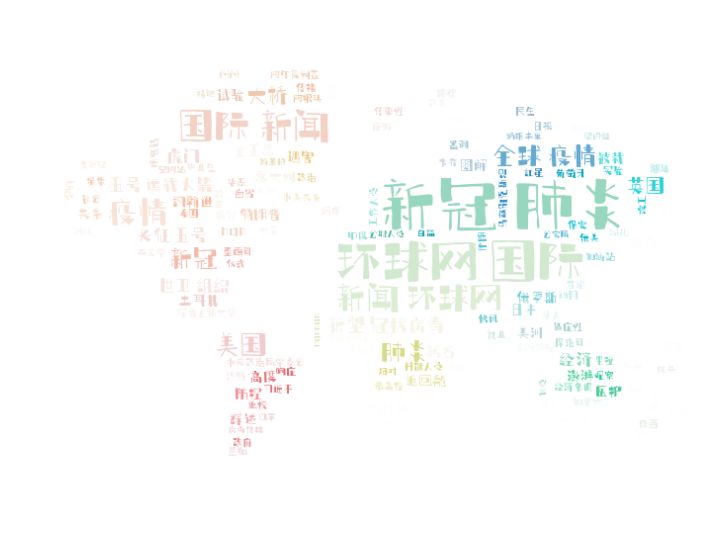

In [61]:
word_cloud = WordCloud(font_path="font.ttf", background_color = "white",max_words = 2000,max_font_size = 100,random_state=10,mask = background_image)
word_cloud.generate(s)
plt.figure(figsize=(12,12))
image_colors = ImageColorGenerator(background_image)
plt.imshow(word_cloud.recolor(color_func = image_colors),interpolation = "bilinear")
plt.axis("off")
plt.savefig("wordcloud.png")
plt.show()